## Importieren von Bibliotheken und Daten

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import geopandas as gpd
# import osmnx as ox
import contextily as cx
import data_preprocessing as dp
import folium
# import streamlit as st
from shapely.geometry import shape

In [2]:
years = range(2020, 2024)
data_list = []

# Schleife über jedes Jahr
for year in years:
    df = pd.read_csv(f"MVG_Rad_Fahrten_{year}.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])
    
    # Entfernen von Leerzeichen in den Columns
    column_names = [dp.remove_space(column) for column in df.columns]
    df.columns = column_names

    # Hinzufügen des eingelesenen DataFrames zur Liste
    data_list.append(df)

# alle Daten zu einem einzigen DataFrame kombinieren 
df = pd.concat(data_list, ignore_index=True)

/var/folders/pd/zg0xw_j14k3gvz5jqksfy67m0000gn/T/ipykernel_27951/1466124582.py:6: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"MVG_Rad_Fahrten_{year}.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])
/var/folders/pd/zg0xw_j14k3gvz5jqksfy67m0000gn/T/ipykernel_27951/1466124582.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"MVG_Rad_Fahrten_{year}.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])
/var/folders/pd/zg0xw_j14k3gvz5jqksfy67m0000gn/T/ipykernel_27951/1466124582.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"MVG_Rad_Fahrten_{year}.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])


## Data Information

In [3]:
df.head()

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME
0,1,2020-01-01 00:10:00,2020-01-01 00:21:00,48.16957,11.58736,48.16568,11.56474,0,,0,
1,2,2020-01-01 00:14:00,2020-01-01 00:32:00,48.13652,11.5929,48.13502,11.57901,0,,0,
2,3,2020-01-01 00:25:00,2020-01-01 00:41:00,48.1706,11.54881,48.16562,11.5648,0,,0,
3,4,2020-01-01 00:29:00,2020-01-01 00:43:00,48.17433,11.56033,48.17326,11.59075,0,,0,
4,5,2020-01-01 00:29:00,2020-01-01 00:30:00,48.12354,11.53372,48.12374,11.53319,0,,0,


In [4]:
df.columns

Index(['Row', 'STARTTIME', 'ENDTIME', 'STARTLAT', 'STARTLON', 'ENDLAT',
       'ENDLON', 'RENTAL_IS_STATION', 'RENTAL_STATION_NAME',
       'RETURN_IS_STATION', 'RETURN_STATION_NAME'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760575 entries, 0 to 2760574
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Row                  int64         
 1   STARTTIME            datetime64[ns]
 2   ENDTIME              datetime64[ns]
 3   STARTLAT             object        
 4   STARTLON             object        
 5   ENDLAT               object        
 6   ENDLON               object        
 7   RENTAL_IS_STATION    object        
 8   RENTAL_STATION_NAME  object        
 9   RETURN_IS_STATION    object        
 10  RETURN_STATION_NAME  object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 231.7+ MB


In [6]:
from datetime import time
df[df["STARTTIME"].dt.time < time(0,1,0)]

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME
3193,3194,2020-01-06,2020-01-06 00:18:00,48.11688,11.54834,48.11585,11.58311,0,,0,
10211,10212,2020-01-12,2020-01-12 00:05:00,48.24835,11.63137,48.2487,11.619,1,U-Bahnhof (P+R) Garching-Hochbrück,1,Graf-Zeppelin-Platz Garching-Hochbrück
19634,19635,2020-01-18,2020-01-18 00:07:00,48.11778,11.54351,48.12017,11.55557,0,,0,
20423,20424,2020-01-19,2020-01-19 00:08:00,48.12873,11.57207,48.12917,11.5583,0,,1,Goetheplatz (Nord)
20424,20425,2020-01-19,2020-01-19 00:15:00,48.11549,11.58074,48.09531,11.57984,1,Silberhornstraße,0,
...,...,...,...,...,...,...,...,...,...,...,...
2749330,698862,2023-12-17,2023-12-17 00:18:00,48.11712,11.52634,48.13731,11.55174,1,Partnachplatz,0,
2753028,702560,2023-12-20,2023-12-20 16:38:00,48.17842,11.55658,48.17842,11.55658,1,Olympiazentrum,1,Olympiazentrum
2753029,702561,2023-12-20,2023-12-20 00:13:00,48.17842,11.55658,48.16096,11.54008,1,Olympiazentrum,0,
2759104,708636,2023-12-30,2023-12-30 00:12:00,48.13936,11.59295,48.15065,11.5746,0,,0,


## Data Feintuning

### Entfernen von Leerzeichen

In [7]:
# Entfernen von Leerzeichen bei Stationsnamen
df["RENTAL_STATION_NAME"] = df["RENTAL_STATION_NAME"].apply(dp.remove_space)
df["RETURN_STATION_NAME"] = df["RETURN_STATION_NAME"].apply(dp.remove_space)

### Formatieren von Daten als Datetime

In [8]:
# STARTTIME und ENDTIME als datetime
df = dp.to_datetime(df)

### Löschen unnötiger Spalten

In [9]:
# Löschen von "Row"
df = df.drop("Row", axis=1)

### Optimierung der Koordinaten

In [10]:
# Formatierung der Koordinaten
# Entfernung ungültiger Daten
df = dp.handle_coordinates(df)

### Optimierung der Spalten IS_STATION

In [11]:
# Formatierung von is_station
df = dp.handle_is_station(df)
# Befüllen von is_station, je nachdem, ob Station Name vorhanden
df = dp.fill_is_station_values(df)

Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             


## Erneute Überprüfung

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760575 entries, 0 to 2760574
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   STARTTIME            datetime64[ns]
 1   ENDTIME              datetime64[ns]
 2   STARTLAT             float64       
 3   STARTLON             float64       
 4   ENDLAT               float64       
 5   ENDLON               float64       
 6   RENTAL_IS_STATION    Int64         
 7   RENTAL_STATION_NAME  object        
 8   RETURN_IS_STATION    Int64         
 9   RETURN_STATION_NAME  object        
dtypes: Int64(2), datetime64[ns](2), float64(4), object(2)
memory usage: 215.9+ MB


In [13]:
for column in df.columns:
    print(f"Anzahl NA-Werte in {column}: {df[column].isna().sum()}")

Anzahl NA-Werte in STARTTIME: 0
Anzahl NA-Werte in ENDTIME: 0
Anzahl NA-Werte in STARTLAT: 19671
Anzahl NA-Werte in STARTLON: 19649
Anzahl NA-Werte in ENDLAT: 24819
Anzahl NA-Werte in ENDLON: 24799
Anzahl NA-Werte in RENTAL_IS_STATION: 0
Anzahl NA-Werte in RENTAL_STATION_NAME: 0
Anzahl NA-Werte in RETURN_IS_STATION: 0
Anzahl NA-Werte in RETURN_STATION_NAME: 0


## Ergänzung einer Spalte für die Dauer einer Fahrt

In [14]:
# Hinzufügen einer Spalte für die Dauer
df["DURATION"] = df["ENDTIME"] - df["STARTTIME"]

# Entfernen von ungültigen Datenpunkten
df = dp.remove_invalid_datetime(df)


## Entfernen aller Zeilen mit NAN-Werten, Sicherung des ursprünglichen DataFrames

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2760518 entries, 0 to 2760574
Data columns (total 11 columns):
 #   Column               Dtype          
---  ------               -----          
 0   STARTTIME            datetime64[ns] 
 1   ENDTIME              datetime64[ns] 
 2   STARTLAT             float64        
 3   STARTLON             float64        
 4   ENDLAT               float64        
 5   ENDLON               float64        
 6   RENTAL_IS_STATION    Int64          
 7   RENTAL_STATION_NAME  object         
 8   RETURN_IS_STATION    Int64          
 9   RETURN_STATION_NAME  object         
 10  DURATION             timedelta64[ns]
dtypes: Int64(2), datetime64[ns](2), float64(4), object(2), timedelta64[ns](1)
memory usage: 258.0+ MB


In [16]:
# Achtung: Zu welchem Zeitpunkt soll dies hier geschehen?

df_with_NA_coordinates = df.copy()
df = df.dropna().reset_index()

## Ergänzung geographischer Daten

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717505 entries, 0 to 2717504
Data columns (total 12 columns):
 #   Column               Dtype          
---  ------               -----          
 0   index                int64          
 1   STARTTIME            datetime64[ns] 
 2   ENDTIME              datetime64[ns] 
 3   STARTLAT             float64        
 4   STARTLON             float64        
 5   ENDLAT               float64        
 6   ENDLON               float64        
 7   RENTAL_IS_STATION    Int64          
 8   RENTAL_STATION_NAME  object         
 9   RETURN_IS_STATION    Int64          
 10  RETURN_STATION_NAME  object         
 11  DURATION             timedelta64[ns]
dtypes: Int64(2), datetime64[ns](2), float64(4), int64(1), object(2), timedelta64[ns](1)
memory usage: 254.0+ MB


### Ergänzung von GeoDatenpunkten

In [18]:
# Füge GeoSeries für die einzelnen Punkte hinzu
df["START_POINT"] = gpd.GeoSeries.from_xy(df["STARTLON"], df["STARTLAT"], crs="EPSG:4326")
df["END_POINT"] = gpd.GeoSeries.from_xy(df["ENDLON"], df["ENDLAT"], crs="EPSG:4326")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717505 entries, 0 to 2717504
Data columns (total 14 columns):
 #   Column               Dtype          
---  ------               -----          
 0   index                int64          
 1   STARTTIME            datetime64[ns] 
 2   ENDTIME              datetime64[ns] 
 3   STARTLAT             float64        
 4   STARTLON             float64        
 5   ENDLAT               float64        
 6   ENDLON               float64        
 7   RENTAL_IS_STATION    Int64          
 8   RENTAL_STATION_NAME  object         
 9   RETURN_IS_STATION    Int64          
 10  RETURN_STATION_NAME  object         
 11  DURATION             timedelta64[ns]
 12  START_POINT          geometry       
 13  END_POINT            geometry       
dtypes: Int64(2), datetime64[ns](2), float64(4), geometry(2), int64(1), object(2), timedelta64[ns](1)
memory usage: 295.4+ MB


### Ergänzung der Distanz

In [20]:
def calculate_distance(df:pd.DataFrame) -> pd.DataFrame:
    """Takes DataFrame with two GeoPoints and calculates distance between them in metres, convertes into kilometres. Returns modified DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with geographical Points in columns START_POINT and END_POINT

    Returns:
        pd.DataFrame: Modified DataFrame with added DISTANCE column in kilometres
    """
    # Erstelle GeoSeries
    start_points = gpd.GeoSeries(df["START_POINT"].copy())
    end_points = gpd.GeoSeries(df["END_POINT"].copy())

    # Umrechnen in anderes EPSG, um Distanzen berechnen zu können
    start_points = start_points.to_crs(epsg=3857)
    end_points = end_points.to_crs(epsg=3857)
    # Berechne Distanz in Metern, Umrechnen in Kilometer
    distance = start_points.distance(end_points) / 1000
    df["DISTANCE"] = distance
    return df

# df = calculate_distance(df)
# df.head()


#### Distanzberechnung mit Geopandas

In [21]:
# Kleines Testfeld für die Distanzberechnung
longitude1 = [11.58736, 11.59290]
longitude2 = [11.56474, 11.57901]
latitude1 = [48.16957, 48.13652]
latitude2 = [48.16568, 48.13502]

coordinates1 = gpd.GeoSeries.from_xy(longitude1, latitude1, crs="EPSG:4326")
coordinates2 = gpd.GeoSeries.from_xy(longitude2, latitude2, crs="EPSG:4326")
print(coordinates1.crs)
coordinates1_3857 = coordinates1.to_crs(epsg=3857)
coordinates2_3857 = coordinates2.to_crs(epsg=3857)
print(coordinates1_3857.crs)
coordinates1_3395 = coordinates1.to_crs(epsg=3395)
coordinates2_3395 = coordinates2.to_crs(epsg=3395)
print(coordinates1_3395.crs)

distance_3857 = coordinates1_3857.distance(coordinates2_3857)
distance_3395 = coordinates1_3395.distance(coordinates2_3395)
print(f"distance_3857: {distance_3857}")
print(f"distance_3395: {distance_3395}")

# Fazit: Weder EPSG 3857 noch EPSG 3395 sind genau genug. Erwartet wären ca. 1730 und 1050.

EPSG:4326
EPSG:3857
EPSG:3395
distance_3857: 0    2600.405998
1    1566.340669
dtype: float64
distance_3395: 0    2599.922139
1    1566.221235
dtype: float64


#### geodätische Distanzberechnung mit geopy

In [22]:
# geodätische Distanzberechnung

from geopy.distance import geodesic

# Koordinaten
longitude1 = [11.58736, 11.59290]
longitude2 = [11.56474, 11.57901]
latitude1 = [48.16957, 48.13652]
latitude2 = [48.16568, 48.13502]

# Erstelle GeoSeries mit den Koordinaten und CRS EPSG:4326
coordinates1 = gpd.GeoSeries.from_xy(longitude1, latitude1, crs="EPSG:4326")
coordinates2 = gpd.GeoSeries.from_xy(longitude2, latitude2, crs="EPSG:4326")

# Vektorisierte Berechnung der geodätischen Distanzen
def calculate_geodesic(row):
    point1 = (row["STARTLAT"], row["STARTLON"])  # erst Breitengrad, dann Längengrad
    point2 = (row["ENDLAT"], row["ENDLON"])
    return geodesic(point1, point2).kilometers

# Füge Distanz-Spalte hinzu
df['DISTANCE'] = df.apply(calculate_geodesic, axis=1)


In [23]:
df.head()

,index,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,DURATION,START_POINT,END_POINT,DISTANCE
0,0,2020-01-01 00:10:00,2020-01-01 00:21:00,48.16957,11.58736,48.16568,11.56474,0,,0,,0 days 00:11:00,POINT (11.58736 48.16957),POINT (11.56474 48.16568),1.737259
1,1,2020-01-01 00:14:00,2020-01-01 00:32:00,48.13652,11.59290,48.13502,11.57901,0,,0,,0 days 00:18:00,POINT (11.5929 48.13652),POINT (11.57901 48.13502),1.047191
2,2,2020-01-01 00:25:00,2020-01-01 00:41:00,48.17060,11.54881,48.16562,11.56480,0,,0,,0 days 00:16:00,POINT (11.54881 48.1706),POINT (11.5648 48.16562),1.311965
3,3,2020-01-01 00:29:00,2020-01-01 00:43:00,48.17433,11.56033,48.17326,11.59075,0,,0,,0 days 00:14:00,POINT (11.56033 48.17433),POINT (11.59075 48.17326),2.265594
4,4,2020-01-01 00:29:00,2020-01-01 00:30:00,48.12354,11.53372,48.12374,11.53319,0,,0,,0 days 00:01:00,POINT (11.53372 48.12354),POINT (11.53319 48.12374),0.045292


### Ergänzung von Stadtvierteln für Start- und Endpunkte

In [24]:
# Hinzufügen von Stadtvierteln, in denen die Start- und Endpunkte jeweils liegen

city_districts = gpd.read_file("neighbourhoods.geojson") # Stadtviertel-geojson, von AirBNB

# Erstelle zwei Geometrien für Start- und Endpunkte
geo_start = gpd.points_from_xy(x=df["STARTLON"], crs="EPSG:4326", y=df['STARTLAT'])
geo_end = gpd.points_from_xy(x=df["ENDLON"], crs="EPSG:4326", y=df['ENDLAT'])

# Erstelle zwei GeoDataFrames (ein GeoDataFrame nimmt immer nur eine Geometrie an) für Start- und Endpunkte
gdf_start = gpd.GeoDataFrame(df[["STARTLAT", "STARTLON"]], geometry=geo_start)
gdf_end = gpd.GeoDataFrame(df[["STARTLAT", "STARTLON"]], geometry=geo_end)

# Führe einen Spatial Join durch, um das Stadtviertel für den Endpunkt zu finden
gdf_start_join = gpd.sjoin(gdf_start, city_districts[["geometry", "neighbourhood"]], how="left", predicate="within", rsuffix="_start")
gdf_end_join = gpd.sjoin(gdf_end, city_districts[["geometry", "neighbourhood"]], how="left", predicate="within", rsuffix="_end")

# Füge die Resultatspalten dem DataFrame hinzu
df["CITY_DISTRICT_START"] = gdf_start_join["neighbourhood"]
df["CITY_DISTRICT_END"] = gdf_end_join["neighbourhood"]

### Ergänzung der Information, ob Start- oder Endpunkt in der city area liegen
In der city area können Fahrräder ohne Bußgeld überall abgestellt werden. Außerhalb der city area ist dies nur an Stationen möglich.

In [25]:
city_area = gpd.read_file("city_area.geojson") # city-area-geojson, selbst erstellt auf geojson.io, per Augenmaß anhand der in der MVGO-App ersichtlichen Ränder der city area

# Geometrie-Variablen von oben können hier weiter verwendet werden, müssen aber in passendes Koordinatenreferenzsystem gecastet werden
gdf_city_start = gdf_start.to_crs(epsg=4326)
gdf_city_end = gdf_end.to_crs(epsg=4326)

# Erstellen eines Shapely Polygons
polygon = shape(city_area["geometry"][0])

# Prüfen, ob Punkte in Polygon liegen, speichern in neuer Spalte
gdf_city_start["RENTAL_IS_CITY"] = gdf_start["geometry"].within(polygon)
gdf_city_end["RETURN_IS_CITY"] = gdf_end["geometry"].within(polygon)
gdf_city_start.head()

# Hinzufügen der Resultatspalten zu DataFrame
df["RENTAL_IS_CITY"] = gdf_city_start["RENTAL_IS_CITY"]
df["RETURN_IS_CITY"] = gdf_city_end["RETURN_IS_CITY"]

# Wahrheitswerte zu Integers umcasten
df["RENTAL_IS_CITY"] = df["RENTAL_IS_CITY"].astype("Int64")
df["RETURN_IS_CITY"] = df["RETURN_IS_CITY"].astype("Int64")

# df.head()

### Stationsdaten extrahieren

In [46]:
def get_station_data(df:pd.DataFrame) -> dict:
    """Takes DataFrame and extracts Station Data, i.e. Latitude and Longitude. Returns dict with Station names as keys and Station geodata as values in list.

    Args:
        df (pd.DataFrame): DataFrame with columns RENTAL_IS_STATION, RETURN_IS_STATION, RENTAL_STATION_NAME, RETURN_STATION_NAME, STARTLAT, STARTLON, ENDLAT, ENDLON

    Returns:
        dict: {station name: [LAT, LON]}
    """
    station_df = df[(df["RENTAL_IS_STATION"] == 1) | (df["RETURN_IS_STATION"] == 1)]\
        [["STARTLAT", "STARTLON", "ENDLAT", "ENDLON", "RENTAL_STATION_NAME", "RETURN_STATION_NAME"]].copy()
    station_data = dict()
    for _, row in station_df.iterrows():
        if row["RENTAL_STATION_NAME"] not in station_data.keys():
            station_data[row["RENTAL_STATION_NAME"]] = [row["STARTLAT"], row["STARTLON"]]
        if row["RETURN_STATION_NAME"] not in station_data.keys():
            station_data[row["RETURN_STATION_NAME"]] = [row["ENDLAT"], row["ENDLON"]]
    station_data.pop("")
    return station_data
        

stat = get_station_data(df)

stat
# for key in stat.keys():
#     print(key)

{'Hochschule München': [48.15406, 11.55351],
 'Bonner Platz': [48.16662, 11.57873],
 'Olympiazentrum': [48.17842, 11.55658],
 'Amalienstraße, Universität': [48.1514, 11.57927],
 'Nordbad': [48.16021, 11.56419],
 'Nordendstraße': [48.15523, 11.57548],
 'Klinikum Harlaching': [48.08664, 11.55491],
 'Maibaumplatz Garching': [48.24959, 11.65319],
 'Untere Strassäcker Garching': [48.25714, 11.65451],
 'Baldeplatz': [48.1233, 11.56691],
 'Technische Universität München': [48.1501, 11.56818],
 'Böhmerwaldplatz': [48.14325, 11.61502],
 'Wasserturm Ismaning': [48.22042, 11.66551],
 'SWM Zentrale, Haupteingang': [48.17124, 11.53124],
 'Großhadern': [48.11555, 11.47604],
 'Röntgenstraße Martinsried': [48.10929, 11.44973],
 'Rotkreuzplatz': [48.15291, 11.5331],
 'Neuperlach Süd': [48.08958, 11.64463],
 'Bamerstraße Neubiberg': [48.07943, 11.64542],
 'Candidplatz': [48.11176, 11.56994],
 'Maillingerstraße': [48.15039, 11.54479],
 'Bahnhof Gronsdorf Haar': [48.11936, 11.69982],
 'Pullacher Platz': [

## Darstellung von Datenpunkten auf Karten

In [27]:
# Im Folgenden Test verschiedener Map-Optionen. Darstellung der Daten nur eines einzelnen Tages

january_1_2023 = df[(df["STARTTIME"].dt.year == 2023) & (df["STARTTIME"].dt.month == 1) & (df["STARTTIME"].dt.day == 1)].copy()


### Contextily (statische Karte)

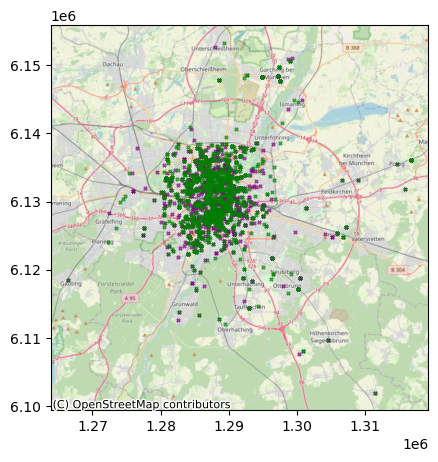

In [28]:
# STATIC MAP WITH CONTEXTILY

# Erstellen eines GeoDataFrames für die Startpunkte
geo_start = gpd.points_from_xy(x=january_1_2023["STARTLON"], crs="EPSG:4326", y=january_1_2023["STARTLAT"])
gdf_start = gpd.GeoDataFrame(january_1_2023, geometry=geo_start)

# Start-GDF in OpenStreetMap-Projektion überführen
gdf_start = gdf_start.to_crs(epsg=3857)

#Erstellen eines GeoDataFrames für die Endpunkte
geo_end = gpd.points_from_xy(x=january_1_2023["ENDLON"], y=january_1_2023["ENDLAT"], crs="EPSG:4326")
gdf_end = gpd.GeoDataFrame(january_1_2023, geometry=geo_end)

# End-GDF in OpenStreetMap-Projektion überführen
gdf_end = gdf_end.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(5, 5))

# Plotten der Punkte
gdf_start.plot(ax=ax, marker="x", color="purple", markersize=5, alpha=0.7) # Start
gdf_end.plot(ax=ax, marker="x", color="green", markersize=5, alpha=0.7) # Ziel

# Füge die Basemap von contextily hinzu
cx.add_basemap(ax, crs=gdf_start.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)


### Folium (dynamische Karte)

In [29]:
# DYNAMIC MAP WITH FOLIUM

# Geht bei Folium auch ohne GeoDataFrame, daher auskommentiert
# geo_start = gpd.points_from_xy(x=january_1_2023['STARTLON'], crs="EPSG:4326", y=january_1_2023['STARTLAT'])
# gdf_start_jan_1_2023 = gpd.GeoDataFrame(january_1_2023, geometry=geo_start)

map_center = [january_1_2023["STARTLAT"].mean(), january_1_2023["STARTLON"].mean()]
my_map = folium.Map(location=map_center, zoom_start=13)

# january_1_2023_folium.apply(lambda row:folium.CircleMarker(location=[row["STARTLAT"], row["STARTLON"]]).add_to(my_map), axis=1)
for index, row in january_1_2023.iterrows():
    folium.CircleMarker(location=[row["STARTLAT"], row["STARTLON"]],
                        radius=1.3,
                        color="purple",
                        fill=True,
                        fill_color="purple",
                        fill_opacity=0.5
                        ).add_to(my_map)
    
for index, row in january_1_2023.iterrows():
    folium.CircleMarker(location=[row["ENDLAT"], row["ENDLON"]],
                        radius=1.3,
                        color="green",
                        fill=True,
                        fill_color="green",
                        fill_opacity=0.5
                        ).add_to(my_map)
    

# Lade die GeoJSON-Datei der Stadtviertel
city_districts = gpd.read_file("neighbourhoods.geojson")

# Füge die Stadtviertel als GeoJSON auf der Karte hinzu
folium.GeoJson(
    city_districts,
    name="Stadtviertel",
    style_function=lambda feature: {
        "fillColor": "lightblue",  # Füllfarbe der Stadtviertel
        "color": "blue",
        "weight": 2,
        "opacity": 0.6,
        "fillOpacity": 0.4
    }
).add_to(my_map)

# Füge den Stadtbereich als GeoJSON auf der Karte hinzu
folium.GeoJson(
    city_area,
    name="Stadtbereich",
    style_function=lambda feature: {
        "fillColor": "lightgreen",  # Füllfarbe des Stadtbereichs
        "color": "green",
        "weight": 2,
        "opacity": 0.6,
        "fillOpacity": 0.4
    }
).add_to(my_map)

# Uncomment to show map:
# my_map

#### Mappen der Stationen

In [30]:
# Mappen der Stationen
map_center = [january_1_2023["STARTLAT"].mean(), january_1_2023["STARTLON"].mean()]
my_map = folium.Map(location=map_center, zoom_start=13)
# for station, coordinates in stat.items():
#     folium.Marker(location=coordinates,
#                   tooltip=f"{station}",
#                     icon=folium.Icon(color="blue",
#                                      icon="bicycle",
#                                      prefix="fa")
#                         ).add_to(my_map)

#### Heatmaps

In [52]:
# Heatmap
# erster Test mit Start-Stationen
# HeatMap möchte folgendes Format: [[Breitengrad, Längengrad, Gewichtung (aka Anzahl)], [Breitengrad, Längengrad, Gewichtung]]
from folium.plugins import HeatMap
# size() liefert die "Größe", die Anzahl der Zeilen pro Koordinate
heat_data_start = january_1_2023[(january_1_2023["RENTAL_IS_STATION"] == 1)].groupby(["STARTLAT", "STARTLON"]).size().reset_index(name="counts").values.tolist()
# heat_map = HeatMap(heat_data_start, min_opacity=0.2, radius=25, blur=18)
# heat_map.add_to(my_map)

[[48.00491, 11.68065, 1.0],
 [48.01705, 11.71913, 2.0],
 [48.03484, 11.52136, 1.0],
 [48.03886, 11.54927, 1.0],
 [48.04181, 11.523, 1.0],
 [48.04575, 11.61514, 3.0],
 [48.05131, 11.60877, 1.0],
 [48.06212, 11.67975, 4.0],
 [48.06472, 11.556, 1.0],
 [48.06747, 11.5392, 2.0],
 [48.06879, 11.61919, 2.0],
 [48.07036, 11.37627, 1.0],
 [48.0714, 11.60636, 2.0],
 [48.07144, 11.68162, 4.0],
 [48.07668, 11.55033, 1.0],
 [48.08958, 11.64463, 4.0],
 [48.09785, 11.58127, 2.0],
 [48.09874, 11.53784, 1.0],
 [48.10039, 11.55107, 3.0],
 [48.10144, 11.54664, 2.0],
 [48.10331, 11.59736, 1.0],
 [48.10541, 11.54542, 1.0],
 [48.10701, 11.55235, 4.0],
 [48.10831, 11.72355, 2.0],
 [48.1087, 11.55723, 1.0],
 [48.10879, 11.54892, 2.0],
 [48.10899, 11.53608, 3.0],
 [48.10944, 11.47498, 2.0],
 [48.11036, 11.59508, 4.0],
 [48.11096, 11.71503, 1.0],
 [48.1117, 11.73105, 2.0],
 [48.11176, 11.56994, 1.0],
 [48.11267, 11.54904, 4.0],
 [48.11285, 11.58749, 2.0],
 [48.11548, 11.58073, 2.0],
 [48.11555, 11.47604, 2.0],


In [50]:
# Heatmap-Daten für das gesamte DataFrame, Start- und Endpunkte zusammenfassend
# Anzahl der Zeilen (also der Ausleihvorgänge) je nach RENTAL STATION, gespeichert in einer Liste
heat_data_list_start = df[(df["RENTAL_IS_STATION"] == 1)].groupby(["RENTAL_STATION_NAME"]).size().reset_index(name="counts").values.tolist()
# Anzahl der Zeilen (also der Rückgabevorgänge) je nach RETURN STATION, gespeichert in einer Liste
heat_data_list_end = df[(df["RETURN_IS_STATION"] == 1)].groupby(["RETURN_STATION_NAME"]).size().reset_index(name="counts").values.tolist()
# Überführen der Startliste in ein Dictionary
heat_data_dict = dict(heat_data_list_start)
# Speichern der Keys des Dictionarys in einer Variablen, um ...
heat_keys = heat_data_dict.keys()

# ... die Anzahl der Rückgabevorgänge für jede Station zu addieren oder im Dictionary zu ergänzen
for station in heat_data_list_end:
    if station[0] not in heat_keys:
        heat_data_dict[station[0]] = station[1]
    elif station[0] in heat_keys:
        heat_data_dict[station[0]] += station[1]

# bringt die Daten für jede Station in das von HeatMap geforderte Format. stat ist ein Dictionary, welches Stationen und deren Koordinaten enthält (wurde weiter oben erstellt)
heat_data = [[stat[station][0], stat[station][1], heat_data_dict[station]] for station in stat]
# sortiert nach Anzahl. Für den Fall, dass auf die wichtigsten oder unwichtigsten gefiltert werden soll.
heat_data_sorted = sorted(heat_data, key=lambda x: x[2], reverse=True)
heat_data_sorted

[[48.15128, 11.55832, 27113],
 [48.16199, 11.58654, 23174],
 [48.17842, 11.55658, 21809],
 [48.14818, 11.56833, 19767],
 [48.14954, 11.58065, 18644],
 [48.15291, 11.5331, 18093],
 [48.15039, 11.54479, 17699],
 [48.1501, 11.56818, 16240],
 [48.1421, 11.56099, 16137],
 [48.14984, 11.5845, 14501],
 [48.15972, 11.54663, 14495],
 [48.14281, 11.54874, 14372],
 [48.14873, 11.46176, 13933],
 [48.11267, 11.54904, 13819],
 [48.1504, 11.57583, 13148],
 [48.10944, 11.47498, 13111],
 [48.12917, 11.5583, 12734],
 [48.16107, 11.56782, 12693],
 [48.15514, 11.56676, 12450],
 [48.16021, 11.56419, 12419],
 [48.15406, 11.55351, 12208],
 [48.15664, 11.58934, 11480],
 [48.24835, 11.63137, 10962],
 [48.24959, 11.65319, 10853],
 [48.1233, 11.56691, 10801],
 [48.17533, 11.56591, 10731],
 [48.11036, 11.59508, 10686],
 [48.14005, 11.56466, 10591],
 [48.1358, 11.5987, 10477],
 [48.16177, 11.55311, 10411],
 [48.13203, 11.57647, 10212],
 [48.15256, 11.59345, 10043],
 [48.13363, 11.54453, 9912],
 [48.12632, 11.56677

In [36]:
# Uncomment to show map:
# my_map

In [60]:
df.head()

,index,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,DURATION,START_POINT,END_POINT,DISTANCE,CITY_DISTRICT_START,CITY_DISTRICT_END,RENTAL_IS_CITY,RETURN_IS_CITY
0,0,2020-01-01 00:10:00,2020-01-01 00:21:00,48.16957,11.58736,48.16568,11.56474,0,,0,,0 days 00:11:00,POINT (11.58736 48.16957),POINT (11.56474 48.16568),1.737259,Schwabing-Freimann,Schwabing-West,1,1
1,1,2020-01-01 00:14:00,2020-01-01 00:32:00,48.13652,11.59290,48.13502,11.57901,0,,0,,0 days 00:18:00,POINT (11.5929 48.13652),POINT (11.57901 48.13502),1.047191,Au-Haidhausen,Altstadt-Lehel,1,1
2,2,2020-01-01 00:25:00,2020-01-01 00:41:00,48.17060,11.54881,48.16562,11.56480,0,,0,,0 days 00:16:00,POINT (11.54881 48.1706),POINT (11.5648 48.16562),1.311965,Milbertshofen-Am Hart,Schwabing-West,1,1
3,3,2020-01-01 00:29:00,2020-01-01 00:43:00,48.17433,11.56033,48.17326,11.59075,0,,0,,0 days 00:14:00,POINT (11.56033 48.17433),POINT (11.59075 48.17326),2.265594,Schwabing-West,Schwabing-Freimann,1,1
4,4,2020-01-01 00:29:00,2020-01-01 00:30:00,48.12354,11.53372,48.12374,11.53319,0,,0,,0 days 00:01:00,POINT (11.53372 48.12354),POINT (11.53319 48.12374),0.045292,Sendling-Westpark,Sendling-Westpark,1,1


In [76]:
df_list = []
for year in [2020, 2021]:
    df_temp = df[((df["STARTTIME"].dt.year == year) | (df["ENDTIME"].dt.year == year))].copy()
    df_list.append(df_temp)
df_years_temp = pd.concat(df_list)
df_list2 = []
for month in [3, 5]:
    df_temp2 = df_years_temp[(df_years_temp["STARTTIME"].dt.month == month) | (df_years_temp["ENDTIME"].dt.month == month)].copy()
    df_list2.append(df_temp2)
testframe = pd.concat(df_list2)

In [77]:
testframe.head()

,index,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,DURATION,START_POINT,END_POINT,DISTANCE,CITY_DISTRICT_START,CITY_DISTRICT_END,RENTAL_IS_CITY,RETURN_IS_CITY
67095,67674,2020-02-21 08:34:00,2020-03-18 23:11:00,48.18167,11.55308,48.11893,11.57651,0,,0,,26 days 14:37:00,POINT (11.55308 48.18167),POINT (11.57651 48.11893),7.190804,Milbertshofen-Am Hart,Au-Haidhausen,1,1
67852,68439,2020-02-21 15:50:00,2020-03-03 14:49:00,48.14398,11.67940,48.14389,11.68422,0,,0,,10 days 22:59:00,POINT (11.6794 48.14398),POINT (11.68422 48.14389),0.358832,Tudering-Riem,Tudering-Riem,0,0
75923,76564,2020-02-27 08:11:00,2020-03-03 15:10:00,48.13962,11.55453,48.09580,11.51427,0,,0,,5 days 06:59:00,POINT (11.55453 48.13962),POINT (11.51427 48.0958),5.720693,Ludwigsvorstadt-Isarvorstadt,Thalkirchen-Obersendling-Forstenried-Fürstenri...,1,0
76553,77198,2020-02-27 16:06:00,2020-03-18 23:12:00,48.14467,11.57830,48.13162,11.58952,0,,0,,20 days 07:06:00,POINT (11.5783 48.14467),POINT (11.58952 48.13162),1.674193,Maxvorstadt,Au-Haidhausen,1,1
78051,78702,2020-02-28 20:33:00,2020-03-02 01:56:00,48.10187,11.59835,48.10196,11.59837,0,,0,,2 days 05:23:00,POINT (11.59835 48.10187),POINT (11.59837 48.10196),0.010118,Obergiesing,Obergiesing,1,1
